# Part 1: Analyze and Explore the Climate Data

In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [36]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.

most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")
one_year_ago = most_recent_date - dt.timedelta(days=365)
one_year_ago



datetime.datetime(2016, 8, 23, 0, 0)

In [78]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = (
    session.query(Measurement.date,func.avg(Measurement.prcp))
    .filter(Measurement.date >= one_year_ago)
    .group_by(Measurement.date)
    .all()
)
# prcp_data

In [79]:

# Iterate over the results and extract the date and precipitation values
dates = [row[0] for row in prcp_data ]
# dates

In [80]:
precipitation = [row[1] for row in prcp_data ]
# precipitation

In [81]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_data, columns=["date", "prcp"])
df.date = pd.to_datetime(df.date)


In [82]:
# Set the index to the date column
df.set_index("date", inplace=True)

# Sort the dataframe by date
df.sort_values('date')

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


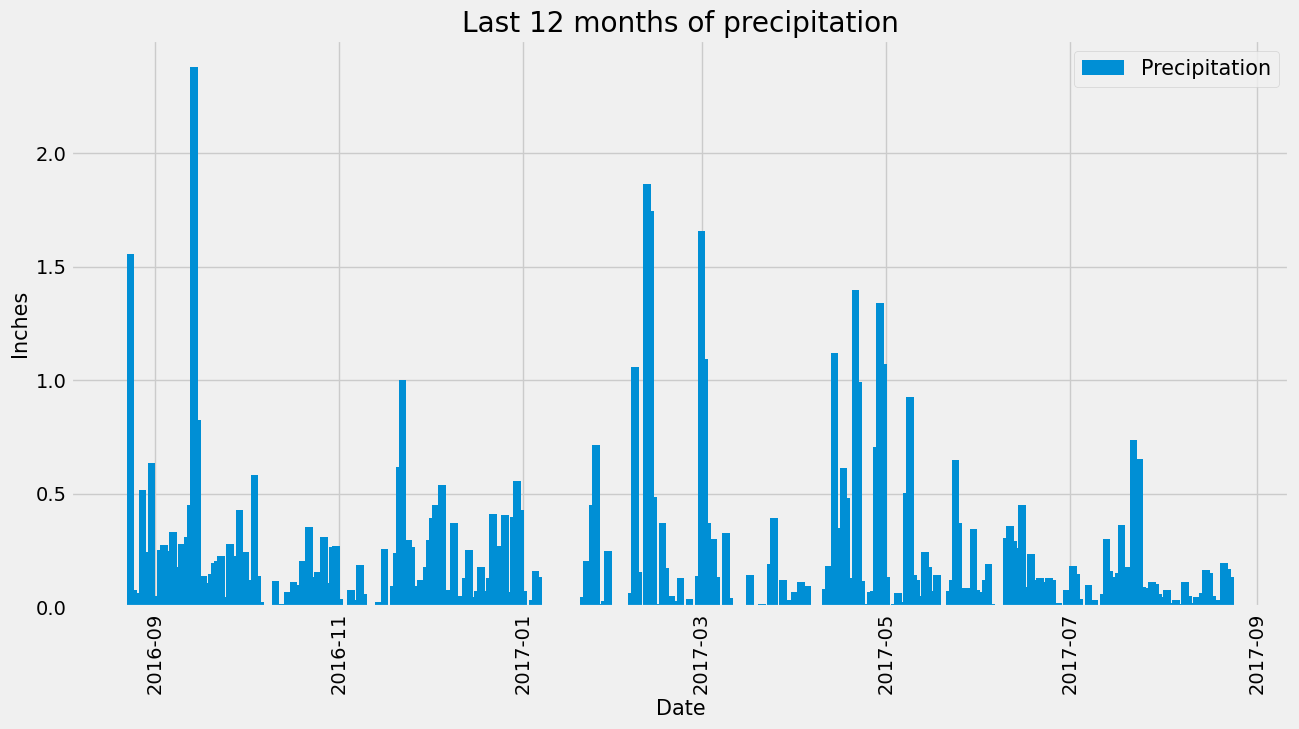

In [83]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(14, 7))

plt.bar(df.index,df['prcp'],width=2.5)
plt.xticks(rotation=90)
plt.title('Last 12 months of precipitation')
plt.xlabel('Date',fontsize =15)
plt.ylabel('Inches', fontsize =15)
plt.xticks(rotation=90)
plt.legend(['Precipitation'],fontsize =15)

plt.show()

# plt.savefig('Last 12 months of precipitation.jpg') #save as jpg


In [73]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station).count()
print(num_stations)

9


In [50]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the station id of the most active station
most_active_station_id = most_active_stations[0][0]

# Calculate the minimum, maximum, and average temperature for the most active station
min_temp = (
    session.query(func.min(Measurement.tobs))
    .filter(Measurement.station == most_active_station_id)
    .scalar()
)
max_temp = (
    session.query(func.max(Measurement.tobs))
    .filter(Measurement.station == most_active_station_id)
    .scalar()
)
avg_temp = (
    session.query(func.avg(Measurement.tobs))
    .filter(Measurement.station == most_active_station_id)
    .scalar()
)

print(f"Minimum temperature: {min_temp}")
print(f"Maximum temperature: {max_temp}")
print(f"Average temperature: {avg_temp}")

Minimum temperature: 54.0
Maximum temperature: 85.0
Average temperature: 71.66378066378067


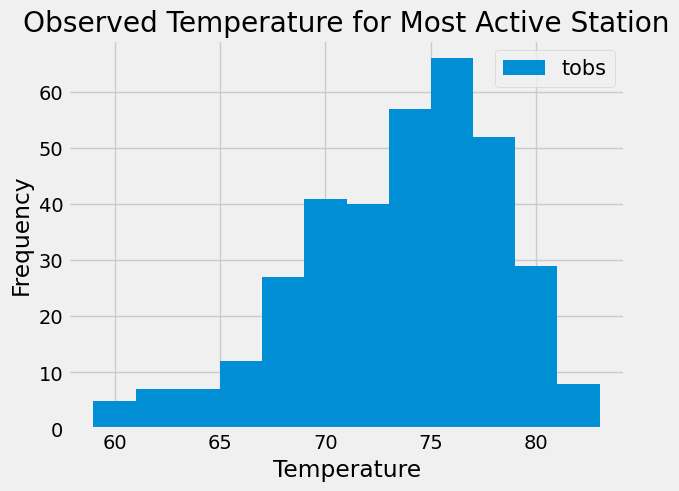

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Get the most recent date in the "measurements" table
most_recent_date = (
    session.query(Measurement.date)
    .order_by(Measurement.date.desc())
    .first()
)[0]

# Convert the string representing the date to a datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year prior to the most recent date
one_year_prior = most_recent_date - dt.timedelta(days=365)


# Query the temperature observation data for the most active station
# for the last 12 months
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station_id)
    .filter(Measurement.date >= one_year_prior)
    .all()
)

# Extract the temperature values from the query results
temperatures = [temp[0] for temp in temperature_data]

# Plot the temperature data as a histogram
plt.hist(temperatures, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Observed Temperature for Most Active Station")
plt.legend(['tobs'],fontsize =15)
plt.show()

# plt.savefig('Observed Temperature for Most Active Station.jpg') #save as jpg



# Close session

In [22]:
# Close Session
session.close()